<a href="https://colab.research.google.com/github/cypherop/Crop-Disease-Detection/blob/master/CropDisease(tflite).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/gdrive',force_remount=True)


Mounted at /gdrive


In [ ]:
!unzip "/gdrive/My Drive/CropDataset.zip"

In [ ]:
!ls

Dataset  sample_data


In [ ]:
import os
import keras
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,MaxPooling2D,Dropout,Lambda,Concatenate
from keras.models import Model,Sequential
from keras.optimizers import Adam

In [ ]:
train_minibatch_size = 128
val_minibatch_size = 64
Image_shape = (256,256,3)

In [ ]:
classes=[]
for clas in os.listdir('./Dataset/train/'):
	classes.append(clas)

In [ ]:
train_batch=ImageDataGenerator(rescale=1./225).flow_from_directory(
            directory='./Dataset/train',
            target_size=(256,256),
            color_mode='rgb',
            classes=classes,
            batch_size=train_minibatch_size,
            class_mode='categorical',
            shuffle=True)

Found 70295 images belonging to 38 classes.


In [ ]:
val_batch=ImageDataGenerator(rescale=1./225).flow_from_directory(
            directory='./Dataset/test',
            target_size=(256,256),
            color_mode='rgb',
            classes=classes,
            batch_size=val_minibatch_size,
            class_mode='categorical',
            shuffle=True)

Found 17572 images belonging to 38 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu',padding='same',input_shape=Image_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(38, activation='softmax'))

In [ ]:

model.compile(Adam(lr=.0001),'categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [ ]:
history = model.fit_generator(train_batch, steps_per_epoch=550, validation_data=val_batch, validation_steps=275, epochs=13, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/13
550/550 [==============================] - 442s 731ms/step - loss: 2.2124 - accuracy: 0.4195 - val_loss: 4.1345 - val_accuracy: 0.2236
Epoch 2/13
550/550 [==============================] - 414s 752ms/step - loss: 0.4792 - accuracy: 0.8527 - val_loss: 0.3703 - val_accuracy: 0.8799
Epoch 3/13
550/550 [==============================] - 414s 752ms/step - loss: 0.2303 - accuracy: 0.9276 - val_loss: 1.0867 - val_accuracy: 0.7324
Epoch 4/13
550/550 [==============================] - 412s 749ms/step - loss: 0.1486 - accuracy: 0.9543 - val_loss: 0.4291 - val_accuracy: 0.8677
Epoch 5/13
550/550 [==============================] - 412s 749ms/step - loss: 0.1030 - accuracy: 0.9676 - val_loss: 0.6421 - val_accuracy: 0.8169
Epoch 6/13
550/550 [==============================] - 412s 749ms/step - loss: 0.0794 - accuracy: 0.9752 - val_loss: 0.1666 - val_accuracy: 0.9473
Epoch 7/13
550/550 [==============================] - 413s 751ms/step - loss: 0.0687 - accuracy: 0.9775 - val_loss: 0.1841 -

In [ ]:

plt.plot(history.history['acc'], color='blue')
plt.plot(history.history['val_acc'], color='yellow')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: ignored

In [ ]:
!unzip "/gdrive/My Drive/CropTestImages.zip"

In [ ]:
model_json = model.to_json()
with open("CropModel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("CropModel.h5")

In [ ]:
!ls

CropModel.h5  CropModel.json  CropTestImages  Dataset  sample_data


Prediction:


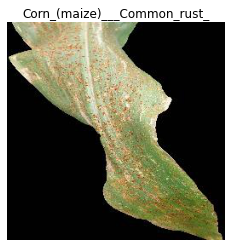

In [ ]:
image_path = "./CropTestImages/test/CornCommonRust3.JPG"
new_img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Prediction:")
prediction = model.predict(img)

fla = prediction.flatten()
ma = fla.max()
for index,item in enumerate(fla):
    if item == ma:
        class_name = classes[index]    
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
import tensorflow as tf


converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

tflite_model_name = "mymodel.tflite"
open(tflite_model_name, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpyl66bt2u/assets


357783456

In [ ]:
!ls

CropModel.h5	CropTestImages	mymodel.tflite
CropModel.json	Dataset		sample_data
